In [87]:
from scipy.io import loadmat
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [88]:
def read_mat_to_df(file_path):
    np_array= loadmat(file_path, matlab_compatible=False, simplify_cells=True, chars_as_strings=True)
    df= pd.DataFrame(np_array['annotations'])
    if 'class_names' in np_array:
        class_names= list(np_array['class_names'])
        df['class_name']= df['class'].map(dict(enumerate(class_names, start=1)))
    # squeeze int-types
    for c, t in df.dtypes.iteritems():
        if t.kind == 'i':
            df[c]= df[c].astype('int16')
    if 'fname' in df.columns:
        df['relative_im_path']= 'car_ims/0' + df['fname']
        df.drop(columns=['fname'], inplace=True)
    return df

cars_full= read_mat_to_df('data_and_labels/cars_annos.mat')

In [89]:
cars_full['class_name'].value_counts().index.tolist()

['GMC Savana Van 2012',
 'Chrysler 300 SRT-8 2010',
 'Mercedes-Benz 300-Class Convertible 1993',
 'Mitsubishi Lancer Sedan 2012',
 'Jaguar XK XKR 2012',
 'Chevrolet Corvette ZR1 2012',
 'Volkswagen Golf Hatchback 1991',
 'Eagle Talon Hatchback 1998',
 'Bentley Continental GT Coupe 2007',
 'Nissan 240SX Coupe 1998',
 'Audi S6 Sedan 2011',
 'Suzuki Kizashi Sedan 2012',
 'Mercedes-Benz C-Class Sedan 2012',
 'Dodge Durango SUV 2007',
 'Volvo 240 Sedan 1993',
 'Ford GT Coupe 2006',
 'Audi S4 Sedan 2007',
 'Chevrolet Avalanche Crew Cab 2012',
 'Spyker C8 Convertible 2009',
 'Aston Martin V8 Vantage Convertible 2012',
 'Daewoo Nubira Wagon 2002',
 'Chrysler PT Cruiser Convertible 2008',
 'Chevrolet Monte Carlo Coupe 2007',
 'Jeep Grand Cherokee SUV 2012',
 'Ford Focus Sedan 2007',
 'Ford F-150 Regular Cab 2007',
 'AM General Hummer SUV 2000',
 'Bentley Continental Flying Spur Sedan 2007',
 'Geo Metro Convertible 1993',
 'Ford Mustang Convertible 2007',
 'Acura Integra Type R 2001',
 'Chevrole

In [90]:
cars_full

,relative_im_path,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class,test,class_name
0,car_ims/000001.jpg,112,7,853,717,1,0,AM General Hummer SUV 2000
1,car_ims/000002.jpg,48,24,441,202,1,0,AM General Hummer SUV 2000
2,car_ims/000003.jpg,7,4,277,180,1,0,AM General Hummer SUV 2000
3,car_ims/000004.jpg,33,50,197,150,1,0,AM General Hummer SUV 2000
4,car_ims/000005.jpg,5,8,83,58,1,0,AM General Hummer SUV 2000
...,...,...,...,...,...,...,...,...
16180,car_ims/016181.jpg,38,36,375,234,196,1,smart fortwo Convertible 2012
16181,car_ims/016182.jpg,29,34,235,164,196,1,smart fortwo Convertible 2012
16182,car_ims/016183.jpg,25,32,587,359,196,1,smart fortwo Convertible 2012
16183,car_ims/016184.jpg,56,60,208,186,196,1,smart fortwo Convertible 2012


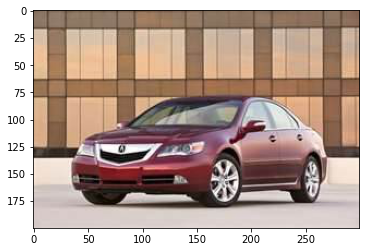

In [492]:
image = Image.open("data_and_labels/car_ims/000354.jpg")
plt.imshow(image)

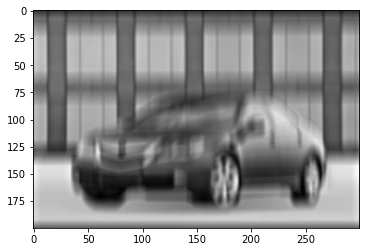

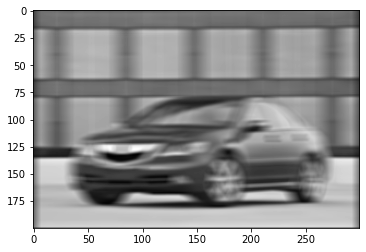

In [493]:
image_array=np.array(image)/255
image_array2=image_array.copy()
images=np.array([image_array,image_array2])


filters=np.full((15,15,3,2),-20)
filters[:,6:9,:,0]=500 # LINIA PIONOWA
filters[6:9,:,:,1]=500 #LINIA POZIOMA

output= tf.nn.conv2d(images, filters, strides=1, padding='SAME')

plt.imshow(output[0,:,:,0],cmap='gray')
plt.show()

plt.imshow(output[0,:,:,1],cmap='gray')
plt.show()

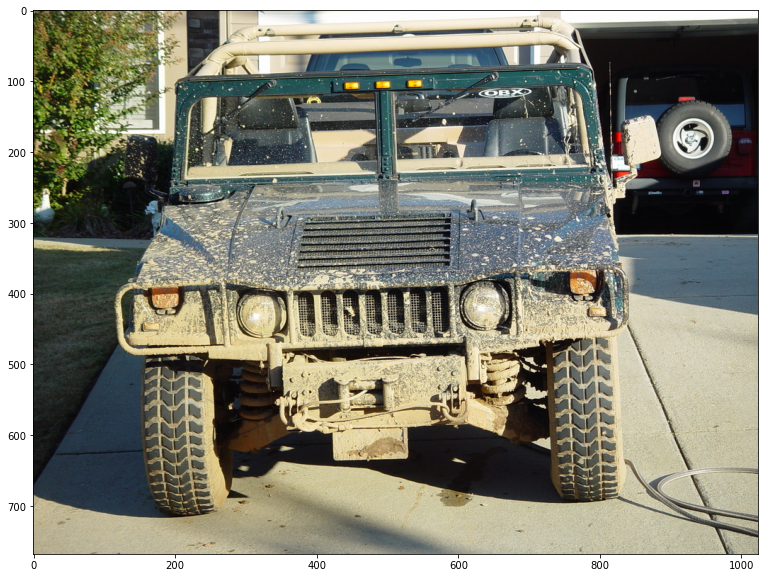

In [560]:
image = Image.open("data_and_labels/car_ims/000001.jpg")
plt.figure(figsize=(15,10))
plt.imshow(image)
image=np.array(image)/255


In [573]:
# creating output of pooling layer for max pooling and average pooling
output_max=tf.nn.max_pool(image,ksize=10, strides=2,padding='VALID')
output_avg=tf.nn.avg_pool(image,ksize=10, strides=2,padding='VALID')

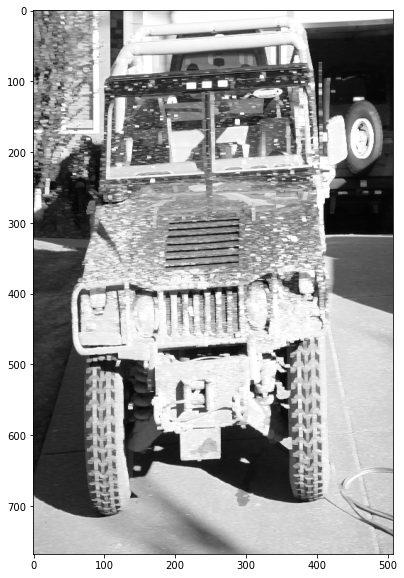

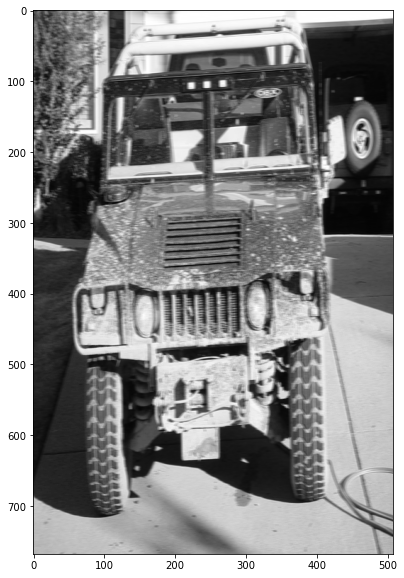

In [574]:
# max pooling
plt.figure(figsize=(15,10))
plt.imshow(output_max[:,:,0],cmap='gray')

#average pooling
plt.figure(figsize=(15,10))
plt.imshow(output_avg[:,:,0],cmap='gray')